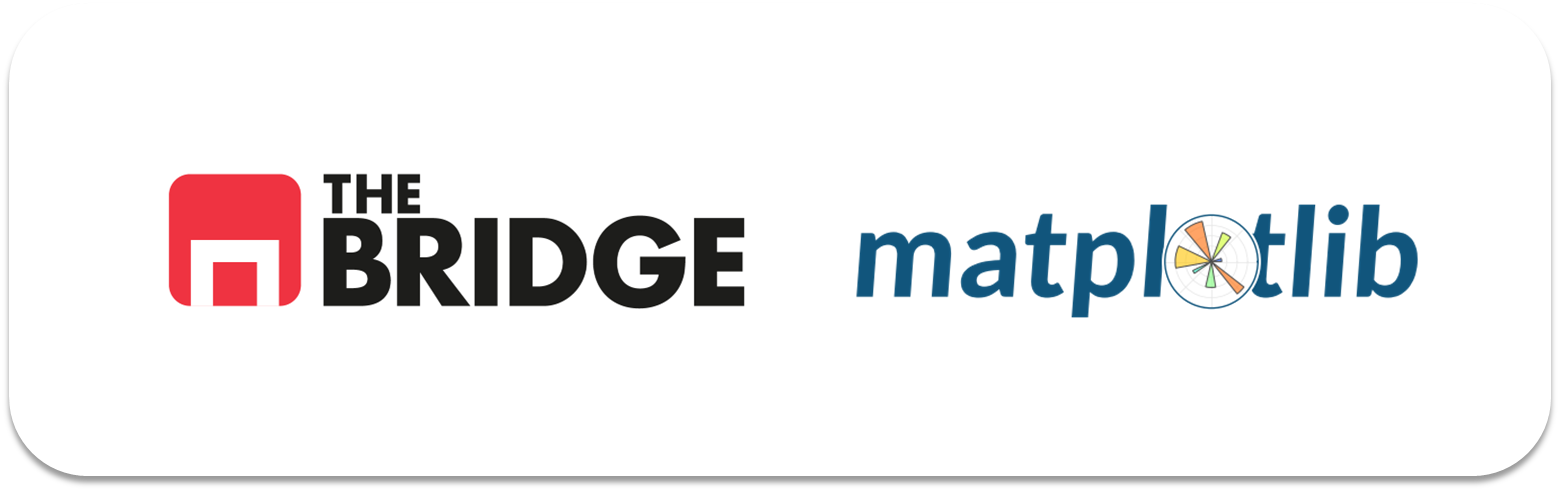

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

In [ ]:
# Paleta de colores de matplotlib
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig


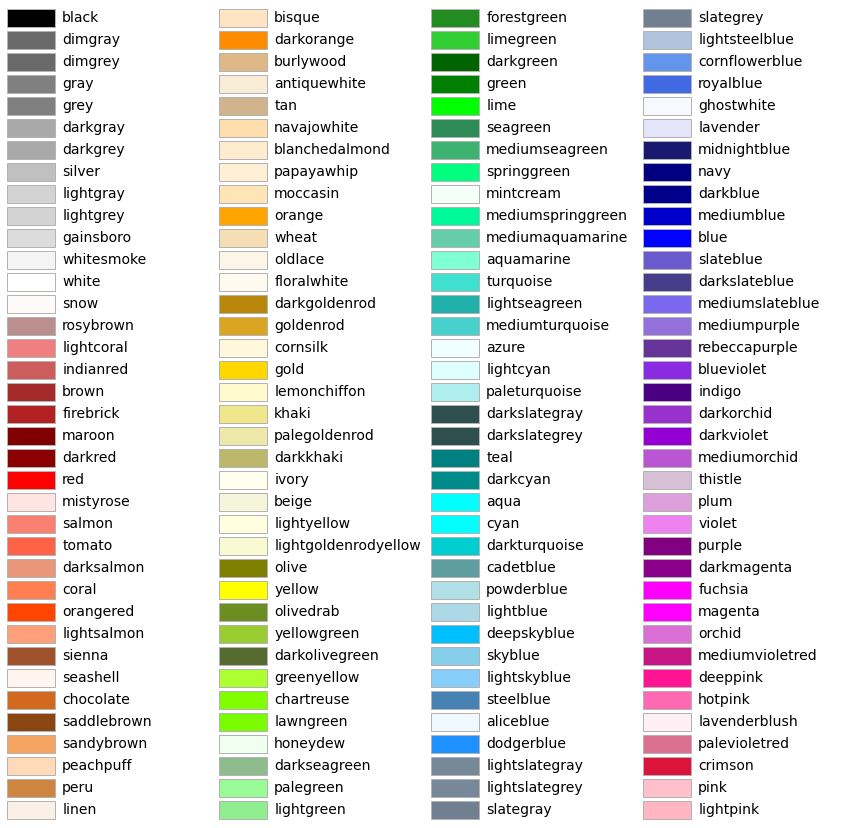

In [37]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
import matplotlib

# para gestionar las fuentes en matplotlib
print(matplotlib.font_manager.findfont('Bradley Hand ITC'))

C:\Windows\Fonts\BRADHITC.TTF


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [3]:
df = pd.read_csv('./data/california_cities.csv')
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
7,7,AmadorCity,38.419444,-120.824167,280.0,919.0,185,0.314,0.314,0.000,0.813,0.813,0.000,0.0
256,256,Menifee,33.678333,-117.166944,434.0,1424.0,77519,46.607,46.466,0.141,120.711,120.345,0.365,0.3


In [12]:
df.dropna(inplace=True)

In [13]:
# comprobamos si hay nulos
df.isna().sum()

Unnamed: 0            0
city                  0
latd                  0
longd                 0
elevation_m           0
elevation_ft          0
population_total      0
area_total_sq_mi      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
dtype: int64

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

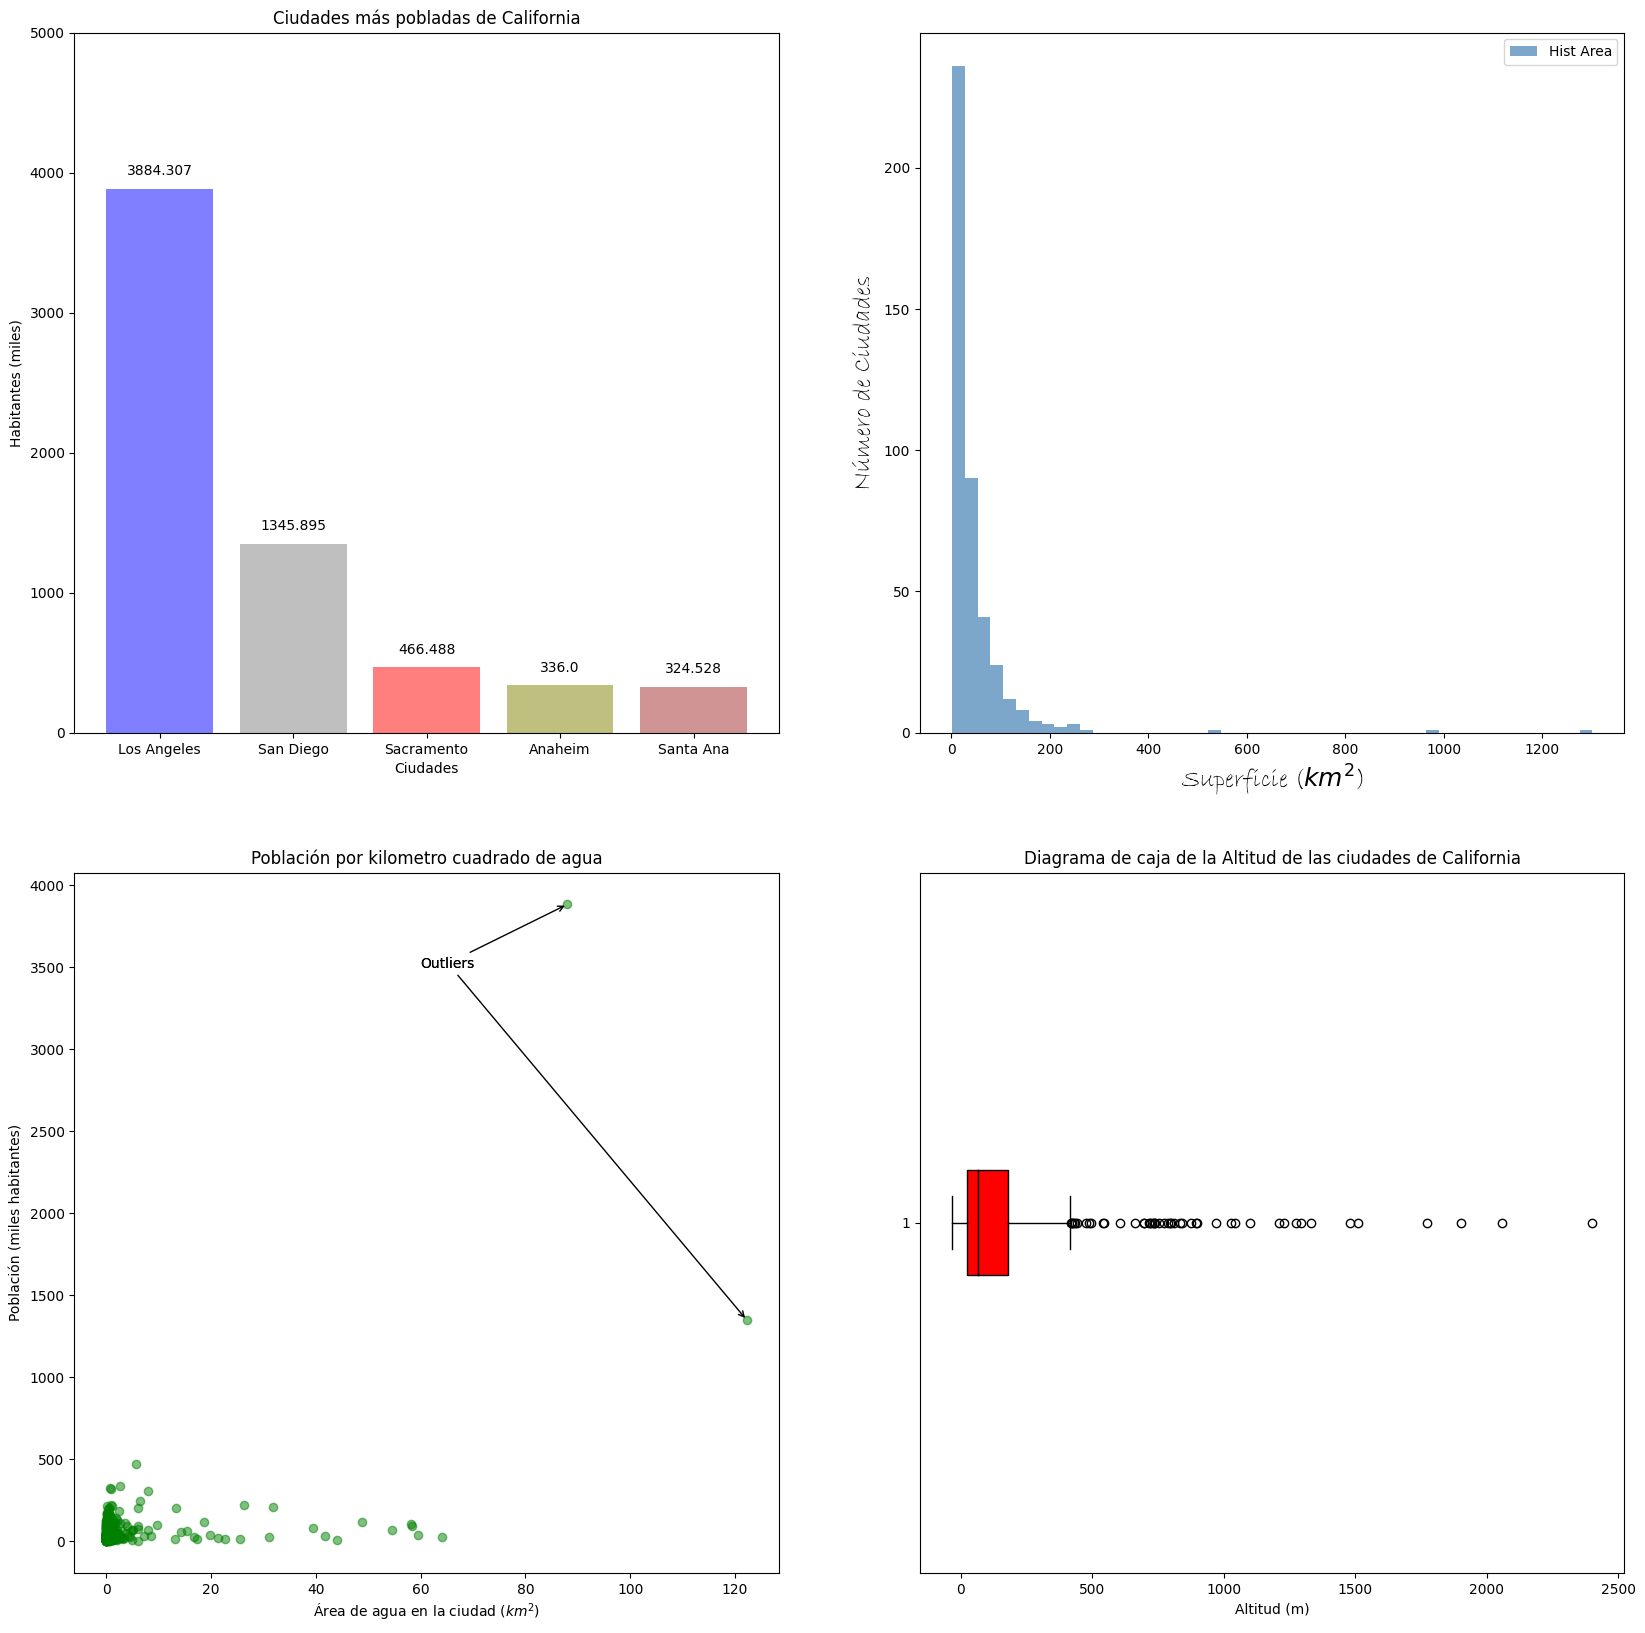

In [4]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
204,204,LagunaHills,33.599722,-117.699444,113.0,371.0,30344,6.695,6.670,0.025,17.340,17.276,0.064,0.37
63,63,Carlsbad,33.121944,-117.296944,16.0,52.0,105328,39.110,37.722,1.388,101.295,97.699,3.596,3.55


In [31]:
# función de usuario para separar los nombres de la población
def separa_nombre(nombre):
    nuevo = nombre[0]
    for letra in nombre[1:]:
        if letra == letra.upper():
            nuevo += " "
        nuevo += letra
    return nuevo

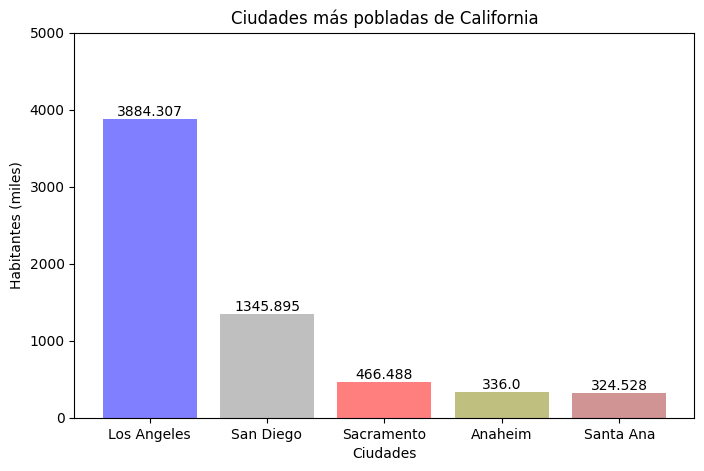

In [39]:
# SOL FIGURA 1

# para obtener las ciudades con mayor población
# df["population_total"].sort_values(ascending=False)[:5]

# alternativa:
ciudades_mas_pobladas = df.loc[df.nlargest(5, 'population_total').index,["city","population_total"]]

# definir argumentos de la figura
ciudades_mas_pobladas.set_index("city",inplace=True)
ciudades = ciudades_mas_pobladas.index.to_list() # nombres de las ciudades para las etiquetas del eje x
ciudades = [separa_nombre(ciudad) for ciudad in ciudades_mas_pobladas.index]

colores = ["blue","gray","red","olive","brown"]

# figura
plt.figure(figsize=(8,5)) #inicio de figura
plt.bar(ciudades, height=ciudades_mas_pobladas["population_total"]/1000,
        color= colores,
        alpha = 0.5)
plt.ylim(0,5000)
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")


# texto sobre las barras con un bucle for
for indice, ciudad in enumerate(ciudades_mas_pobladas.index): # enumerate devuelve lista de tuplas
    poblacion = ciudades_mas_pobladas.loc[ciudad,"population_total"]/1000
    plt.text(x = ciudades[indice], y = poblacion + 0.5, s = f"{poblacion}", ha='center', va='bottom', fontsize=10) # argumentos: x, y, texto

plt.show() #fin de la figura, para mostrar


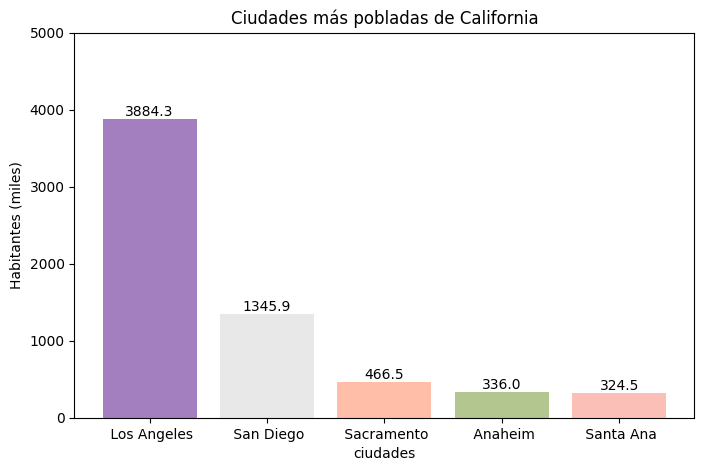

In [ ]:
# SUBPLOT 2.2.1
# 1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos 
# se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)

# identifico las 5 ciudades con mayor población
df_top_populated = df.nlargest(5, 'population_total')
df_top_populated

# genero código de colores
colores = ["indigo","lightgray","coral","olivedrab","salmon"]

# nueva columna con los nombres de las ciudades corregidas
df_top_populated["city_2"] = df_top_populated["city"].str.replace(r'(?<!\s)([A-Z])', r' \1', regex=True)

# gráfico
plt.figure(figsize=(8,5))
plt.bar(df_top_populated["city_2"], height = df_top_populated["population_total"]/1000, color = colores, alpha = 0.5)
plt.ylabel("Habitantes (miles)")
plt.xlabel("ciudades")
plt.ylim(0,5000)
plt.title("Ciudades más pobladas de California")

# # Agregar etiquetas encima de cada barra
for i, value in enumerate(df_top_populated["population_total"]/1000):
    plt.text(x = i, y = value + 0.5, s = f"{value:.1f}", ha='center', va='bottom', fontsize=10)

plt.show()


In [6]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
427,427,Tehachapi,35.132222,-118.448889,1210.0,3970.0,14414,9.971,9.874,0.097,25.823,25.573,0.250,0.97
165,165,Guadalupe,34.965556,-120.573056,26.0,85.0,7080,1.314,1.309,0.005,3.405,3.391,0.014,0.40


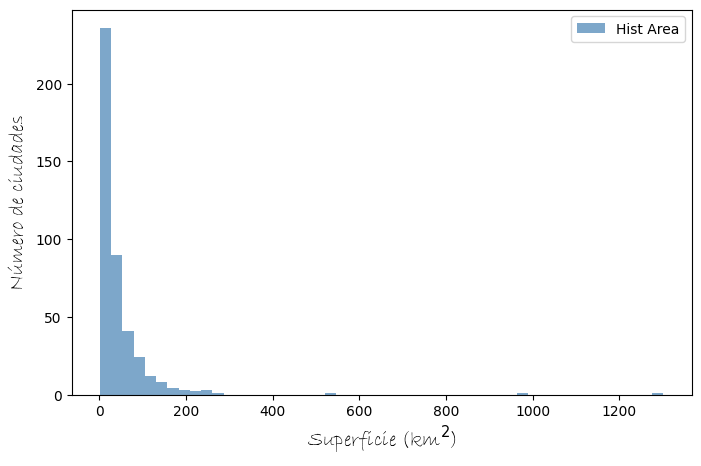

In [48]:
# SOL FIGURA 2

plt.figure(figsize=(8,5))
plt.hist(df["area_total_km2"],
         color="steelblue",
         bins=50,
         alpha=0.7,
         label = "Hist Area")
plt.xlabel("Superficie (km$^2$)",font = "Bradley Hand itc", fontstyle = "italic", fontsize=15)
plt.ylabel("Número de ciudades",font = "Bradley Hand itc", fontstyle = "italic", fontsize=15);
plt.legend()
plt.show()

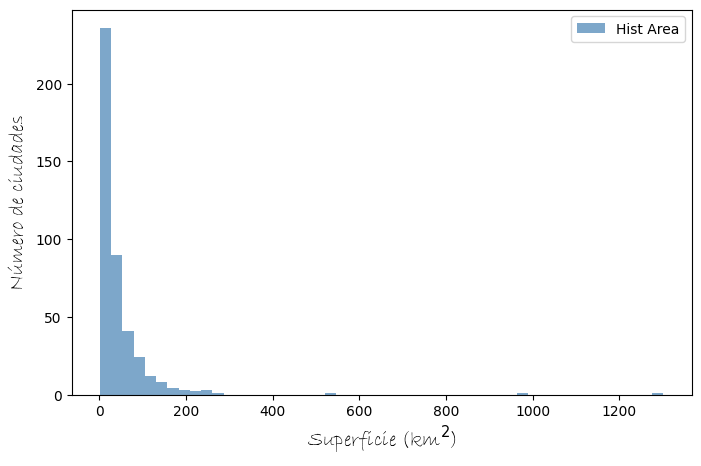

In [47]:
# SUBPLOT 2.2.2
# 2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

plt.figure(figsize=(8,5))
plt.hist(df["area_total_km2"],bins=50,color="steelblue",alpha=0.7,label="Hist Area")
plt.xlabel("Superficie (km$^2$)",font = "Bradley Hand itc",fontsize=15)
plt.ylabel("Número de ciudades",font = "Bradley Hand itc",fontsize=15);
plt.legend()
plt.show();

In [56]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,city_2
346,346,Ridgecrest,35.622500,-117.670833,698.0,2290.0,27616,21.417,20.766,0.651,55.469,53.783,1.685,3.04,NaN
240,240,LosBanos,37.058333,-120.850000,36.0,118.0,35972,10.117,9.993,0.124,26.203,25.882,0.321,1.22,NaN


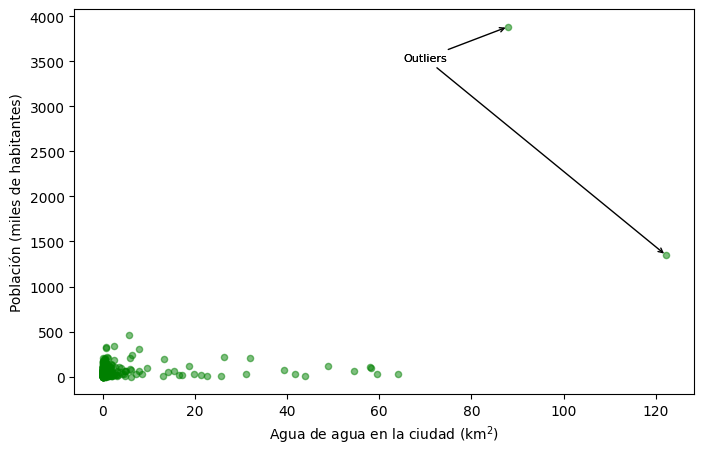

In [53]:
# SOL FIGURA 3

plt.figure(figsize=(8,5)) # inicio de figura

plt.scatter(df["area_water_km2"],df["population_total"]/1000,
            color="green",s=20, 
            alpha=0.5)
plt.xlabel("Agua de agua en la ciudad (km$^2$)")
plt.ylabel("Población (miles de habitantes)")

# Agregar anotaciones para los outliers
# encontrar las coordenadas de los outliers con nlargest sobre población y nlargest sobre area_water, para definir la coordenadas de los annotationes
outlier_1_y = df.loc[df["area_water_km2"].nlargest(2).index]["population_total"].values[0]
outlier_2_y = df.loc[df["area_water_km2"].nlargest(2).index]["population_total"].values[1]
outlier_1_x = df.loc[df["area_water_km2"].nlargest(2).index]["area_water_km2"].values[0]
outlier_2_x = df.loc[df["area_water_km2"].nlargest(2).index]["area_water_km2"].values[1]

xytext = (70,3500)
text = "Outliers"

plt.annotate(
    text,  # Etiqueta
    xy=(outlier_1_x, outlier_1_y/1000),  # Coordenadas del punto
    xytext=xytext,  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)

plt.annotate(
    text,  # Etiqueta
    xy=(outlier_2_x, outlier_2_y/1000),  # Coordenadas del punto
    xytext=xytext,  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)


plt.show(); # muestra figura

Text(75, 3460, '')

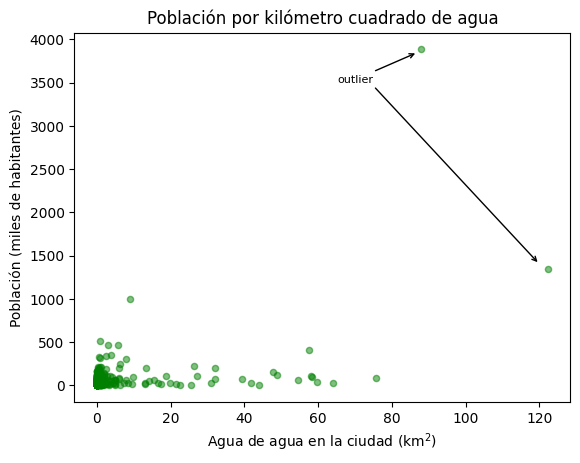

In [101]:
# SUBPLOT 2.2.3
# 3. El scatter de área de agua de un ciudad con su poblacion.

plt.scatter(df["area_water_km2"],df["population_total"]/1000,color="green",s=20, alpha=0.5)
plt.xlabel("Agua de agua en la ciudad (km$^2$)")
plt.ylabel("Población (miles de habitantes)")
plt.title("Población por kilómetro cuadrado de agua");



# Agregar anotaciones para los outliers
plt.annotate(
    "outlier",  # Etiqueta
    xy=(87,3850),  # Coordenadas del punto
    xytext=(70,3500),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)

# Agregar anotaciones para los outliers
plt.annotate(
    "",  # Etiqueta
    xy=(120,1400),  # Coordenadas del punto
    xytext=(75,3460),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)


In [102]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,city_2
298,298,Orland,39.747500,-122.196389,79.0,259.0,7291,2.971,2.971,0.000,7.696,7.696,0.000,0.00,NaN
432,432,Tiburon,37.873611,-122.456667,4.0,13.0,8962,13.182,4.446,8.736,34.140,11.515,22.625,66.27,NaN


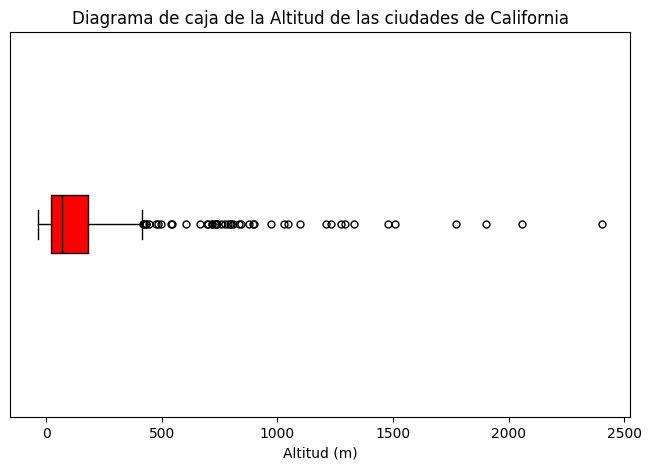

In [63]:
# SOL FIGURA 4

plt.figure(figsize=(8,5)) # inicio de figura

plt.boxplot(df["elevation_m"],
            patch_artist=True, 
            boxprops=dict(facecolor='red',edgecolor='black'), 
            medianprops = dict(color='black'),
            flierprops=dict(marker="o", color="black", markersize=5),
            vert = False)

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California")

plt.yticks([]) # para eliminar el tick del y

plt.show(); # muestra figura

In [60]:
# El boxplot no se puede pintar con NaN

print(df["elevation_m"].describe())  # Resumen estadístico de la columna
print(df["elevation_m"].isnull().sum())  # Ver cuántos valores NaN hay

df_cleaned = df.dropna(subset=["elevation_m"])  # Eliminar filas con NaN en elevation_m

count     427.000000
mean      182.416511
std       311.501270
min       -34.000000
25%        22.000000
50%        67.000000
75%       179.500000
max      2402.000000
Name: elevation_m, dtype: float64
0


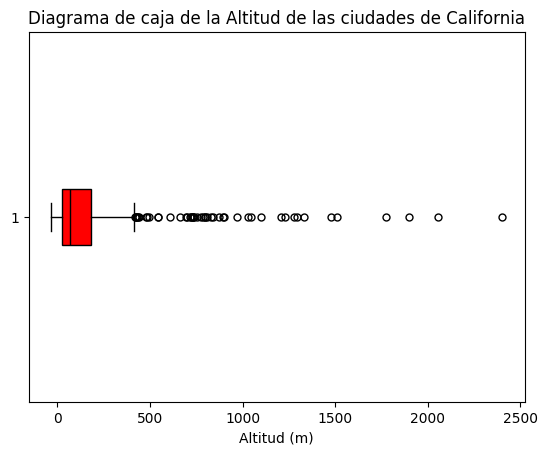

In [61]:
# SUBPLOT 2.2.4
# 4. El boxplot de la altura de las ciudades.

plt.boxplot(df_cleaned["elevation_m"],
            patch_artist=True, 
            boxprops=dict(facecolor='red',edgecolor='black'), 
            medianprops = dict(color='black'),
            flierprops=dict(marker="o", color="black", markersize=5),
            vert = False)

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California");

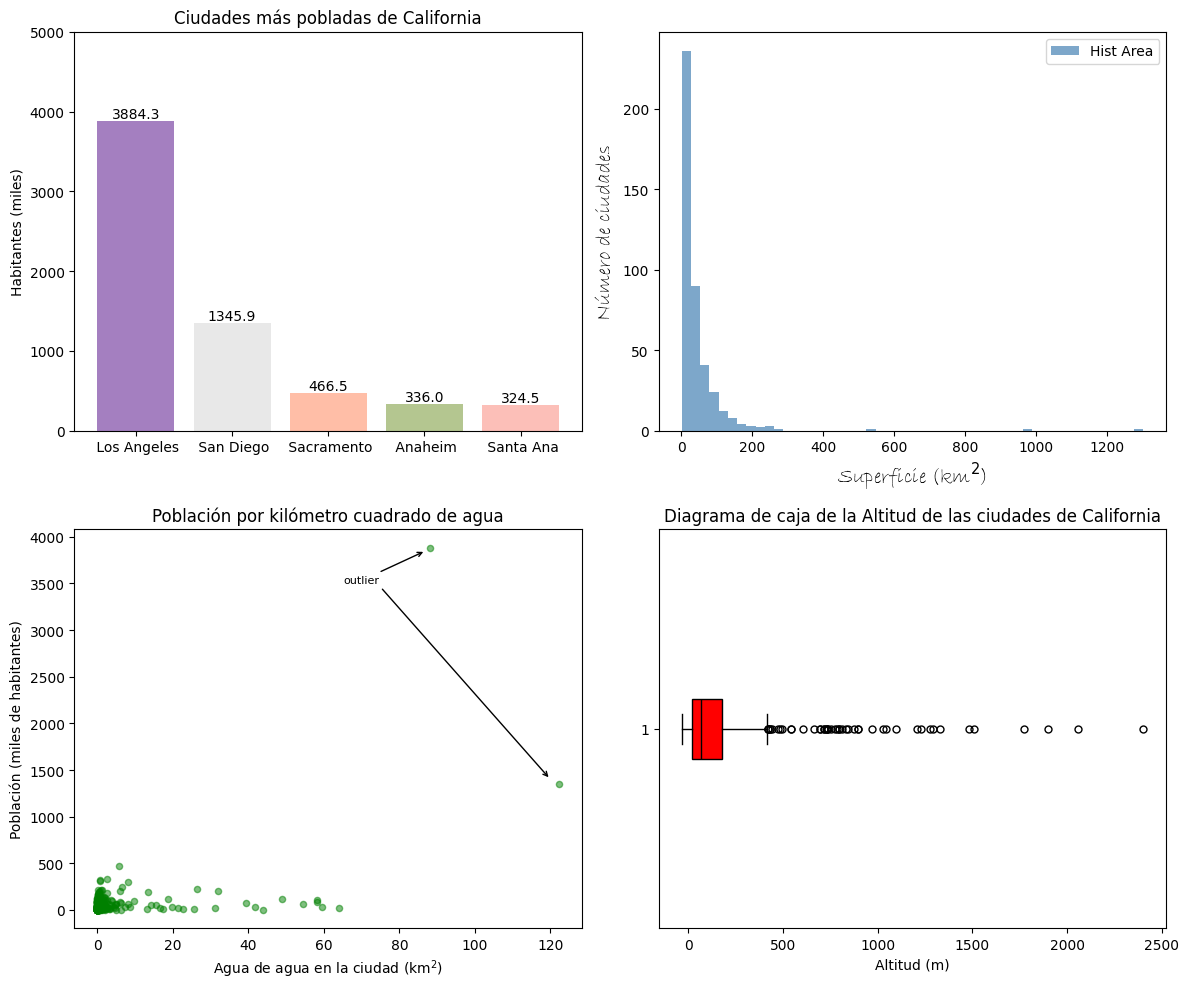

In [64]:
# Definir el tamaño de la figura
plt.figure(figsize=(12, 10))  # Ancho y alto de la figura en pulgadas

# SUBPLOT 2.2.1
plt.subplot(2,2,1)
# identifico las 5 ciudades con mayor población
df_top_populated = df.nlargest(5, 'population_total')
colores = ["indigo","lightgray","coral","olivedrab","salmon"]
df_top_populated["city_2"] = df_top_populated["city"].str.replace(r'(?<!\s)([A-Z])', r' \1', regex=True)

# gráfico
plt.bar(df_top_populated["city_2"], height = df_top_populated["population_total"]/1000, color = colores, alpha = 0.5)
plt.ylabel("Habitantes (miles)")
plt.ylim(0,5000)
plt.title("Ciudades más pobladas de California")
# # Agregar etiquetas encima de cada barra
for i, value in enumerate(df_top_populated["population_total"]/1000):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=10)

# SUBPLOT 2.2.2
plt.subplot(2,2,2)
plt.hist(df["area_total_km2"],bins=50,color="steelblue",alpha=0.7,label="Hist Area")
plt.xlabel("Superficie (km$^2$)",font = "Bradley Hand itc",fontsize = 15)
plt.ylabel("Número de ciudades",font = "Bradley Hand itc", fontsize = 15);
plt.legend()

# SUBPLOT 2.2.3
plt.subplot(2,2,3)
plt.scatter(df["area_water_km2"],df["population_total"]/1000,color="green",s=20, alpha=0.5)
plt.xlabel("Agua de agua en la ciudad (km$^2$)")
plt.ylabel("Población (miles de habitantes)")
plt.title("Población por kilómetro cuadrado de agua");

# Agregar anotaciones para los outliers
plt.annotate(
    "outlier",  # Etiqueta
    xy=(87,3850),  # Coordenadas del punto
    xytext=(70,3500),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)

# Agregar anotaciones para los outliers
plt.annotate(
    "",  # Etiqueta
    xy=(120,1400),  # Coordenadas del punto
    xytext=(75,3460),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)

# SUBPLOT 2.2.4
plt.subplot(2,2,4)
plt.boxplot(df_cleaned["elevation_m"],
            patch_artist=True, 
            boxprops=dict(facecolor='red',edgecolor='black'), 
            medianprops = dict(color='black'),
            flierprops=dict(marker="o", color="black", markersize=5),
            vert = False)

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California");

# Ajustar la separación entre subplots
plt.tight_layout()  # Ajuste automático
# O manualmente con plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

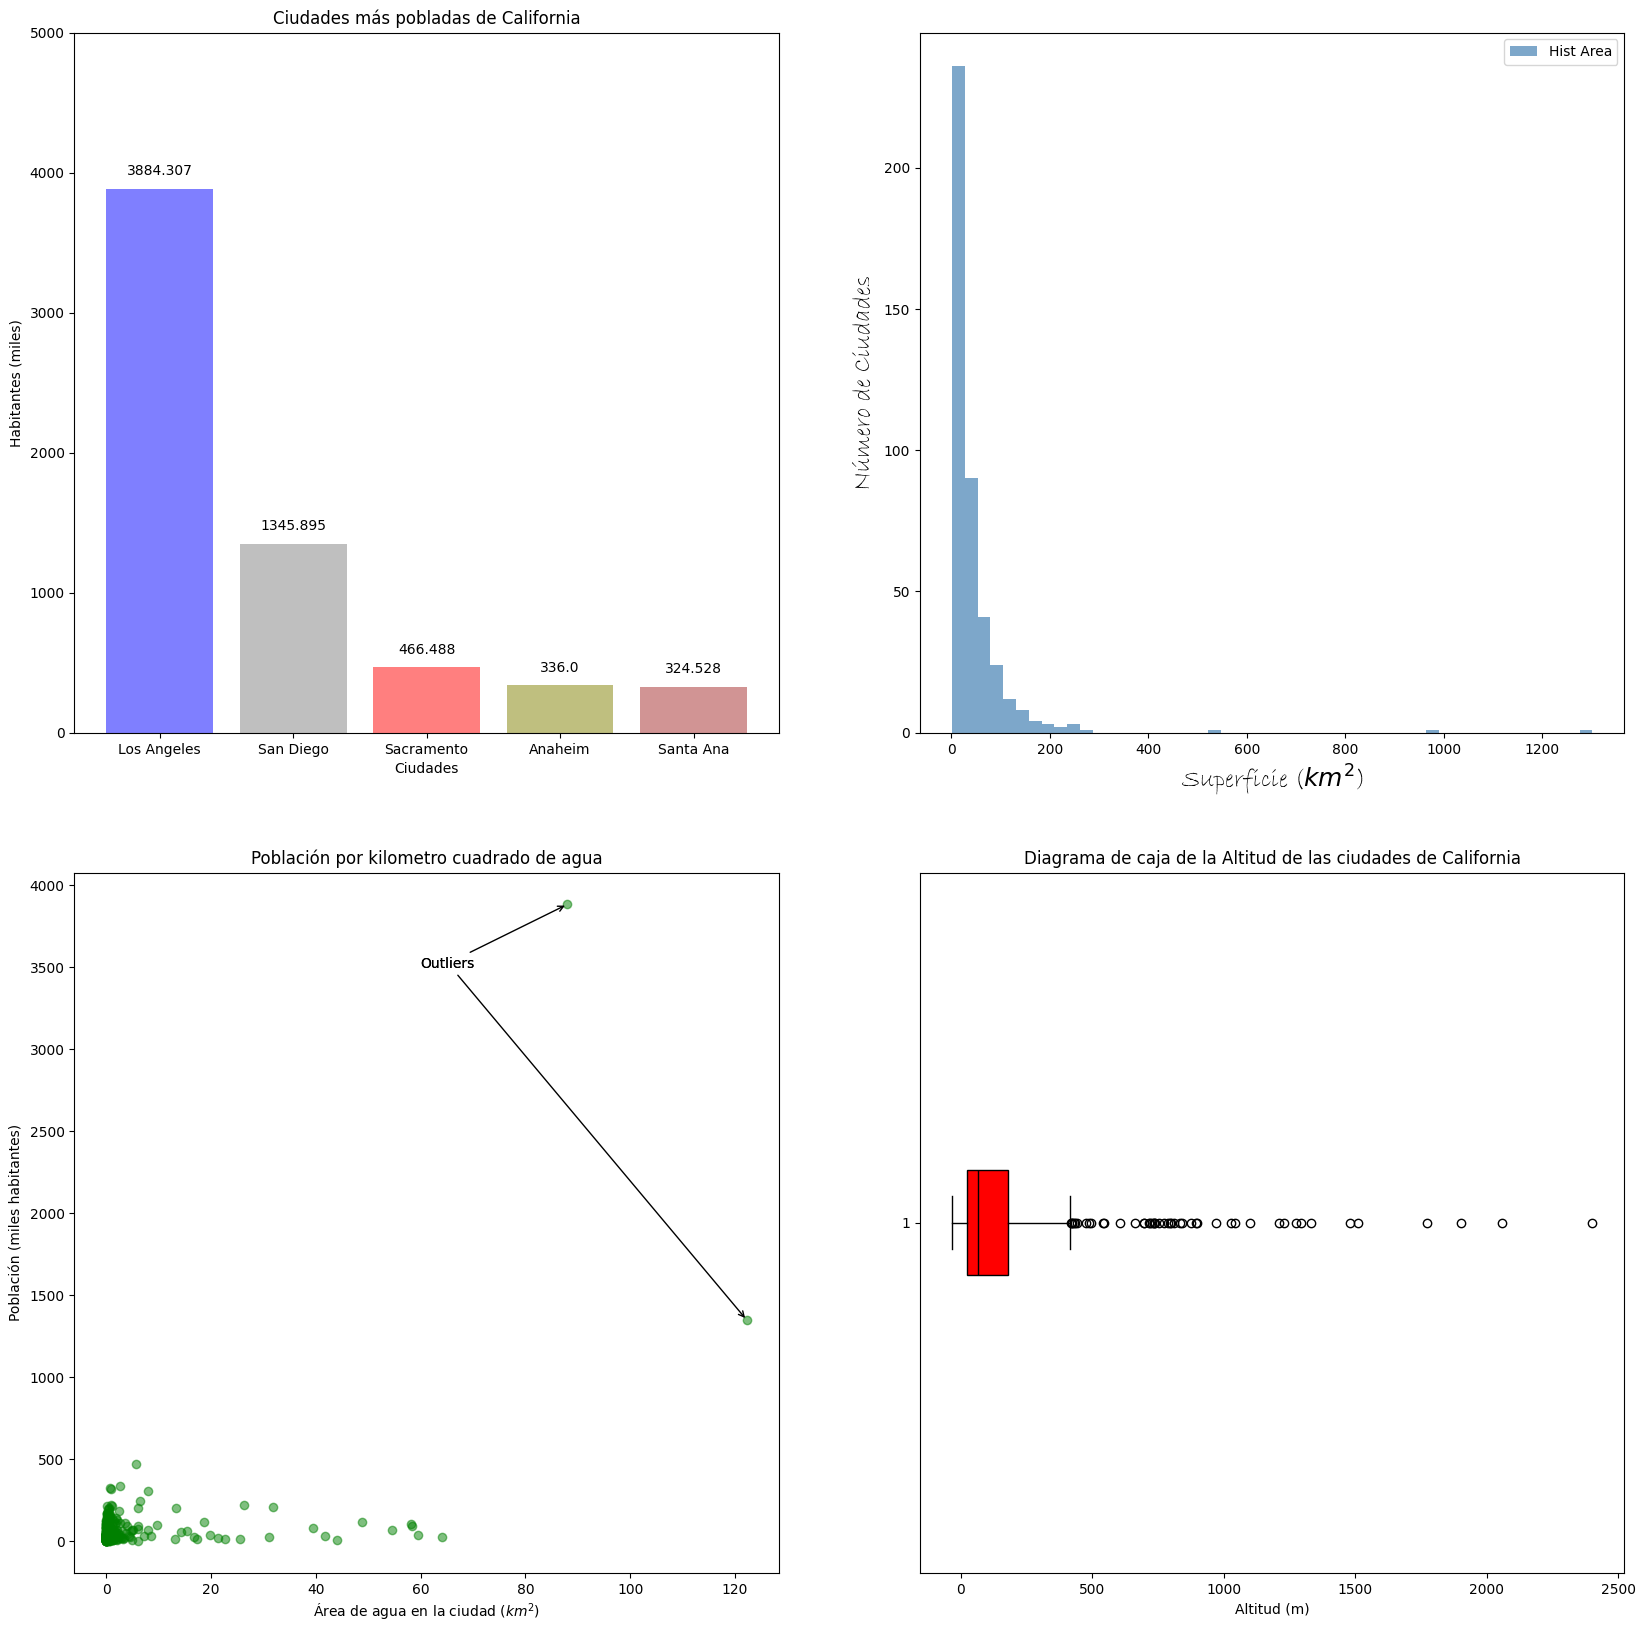

In [65]:
#ALTERNATIVA TODAS JUNTAS CON PROGRAMACIÓN ORIENTADA A OBJETOS

fig,axs = plt.subplots(2,2, figsize = (20,20))
axs = axs.flatten()

# Primera figura
primera = axs[0]
ciudades_mas_pobladas = df.loc[df.population_total.nlargest(5).index, ["city","population_total"]]
ciudades = [separa_nombre(ciudad) for ciudad in ciudades_mas_pobladas["city"].to_list()]
colores = ["blue","gray","red","olive","brown"]

primera.bar(x= ciudades, height= ciudades_mas_pobladas["population_total"]/1000, color = colores, alpha = 0.5)
primera.set_ylim([0,5000])
primera.set_ylabel("Habitantes (miles)")
primera.set_xlabel("Ciudades")

ciudades_mas_pobladas.set_index("city", inplace = True)
for indice, ciudad in enumerate(ciudades_mas_pobladas.index):
    poblacion = ciudades_mas_pobladas.loc[ciudad,"population_total"]/1000
    primera.text(ciudades[indice], poblacion + 100, f"{poblacion}", ha = "center")
primera.set_title("Ciudades más pobladas de California")

# Segunda gráfica
segunda = axs[1]
segunda.hist(df["area_total_km2"], color = "steelblue", alpha = 0.7, bins = 50, label = "Hist Area")
segunda.set_xlabel("Superficie ($km^2$)", fontdict = dict(family = "Bradley Hand itc", size = 18))
segunda.set_ylabel("Número de Ciudades", fontdict= dict(family = "Bradley Hand itc", size = 18))
segunda.legend()


# Tercera gráfica
tercera = axs[2]
tercera.scatter(df["area_water_km2"], df["population_total"]/1000, alpha = 0.5, color = "green")
tercera.set_xlabel("Área de agua en la ciudad ($km^2$)")
tercera.set_ylabel("Población (miles habitantes)")
tercera.set_title("Población por kilometro cuadrado de agua")
outlier_1_y = ciudades_mas_pobladas.population_total.max()
outlier_2_y = ciudades_mas_pobladas.population_total.nlargest(2).iloc[1]
outlier_1_x = df.loc[df.population_total == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df.loc[df.population_total == outlier_2_y,"area_water_km2"].values[0]
tercera.annotate(xy= (outlier_1_x,outlier_1_y/1000), xytext= (60,3500), text = "Outliers",
              arrowprops= dict(arrowstyle = "->"))
tercera.annotate(xy= (outlier_2_x,outlier_2_y/1000), xytext= (60,3500), text = "Outliers",
              arrowprops= dict(arrowstyle = "->"))


#### Cuarta gráfica
cuarta = axs[3]
cuarta.boxplot(df["elevation_m"].dropna(), vert = False, boxprops = dict(facecolor = "red"),
               medianprops = dict(color= "black"), patch_artist= True)
cuarta.set_xlabel("Altitud (m)")
cuarta.set_title("Diagrama de caja de la Altitud de las ciudades de California");

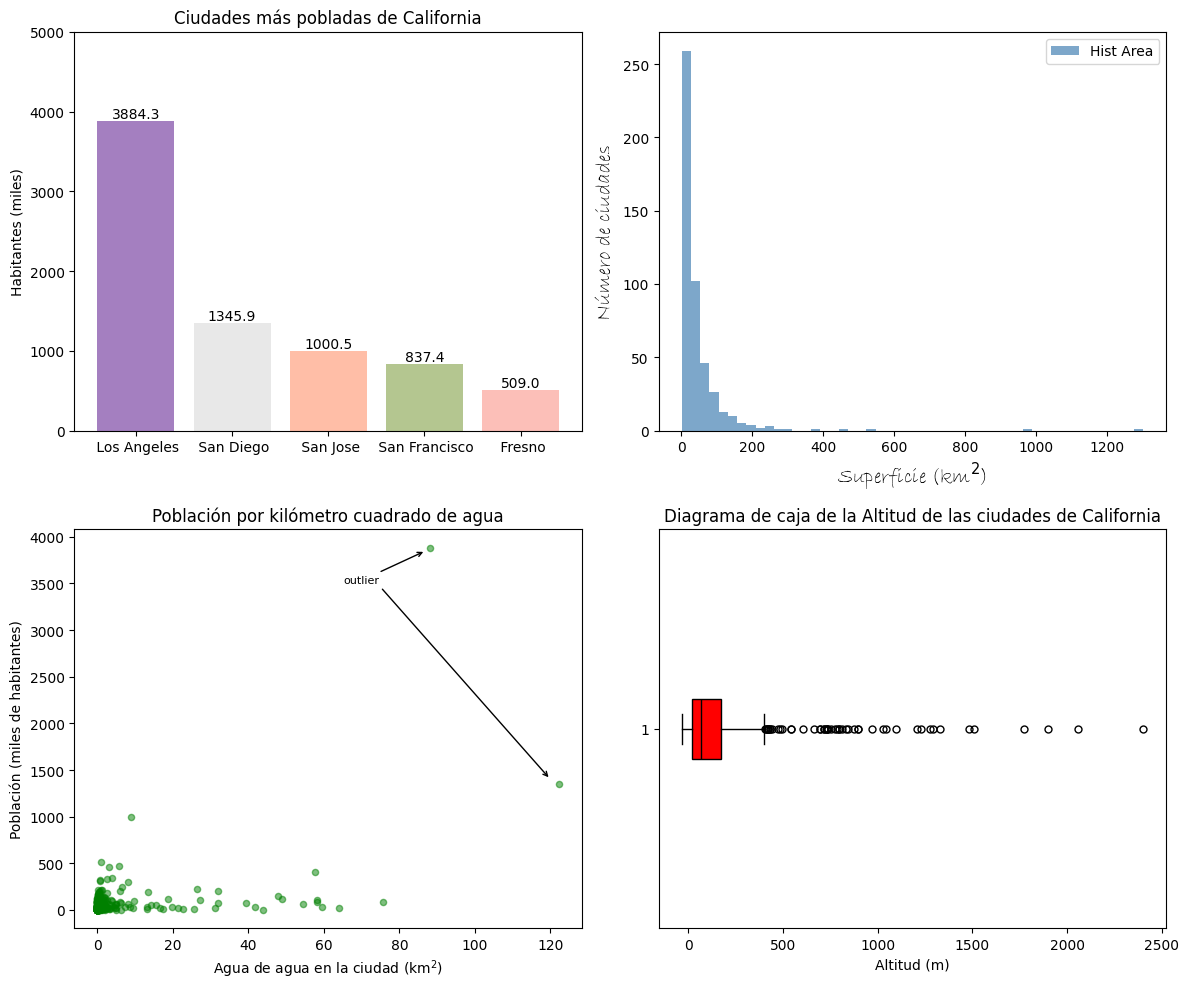

In [133]:
# Crear la figura y guardar como variable
fig = plt.figure(figsize=(12, 10))  # Tamaño de la figura

# Subplot 1
ax1 = fig.add_subplot(2, 2, 1)
df_top_populated = df.nlargest(5, 'population_total')
colores = ["indigo", "lightgray", "coral", "olivedrab", "salmon"]
df_top_populated["city_2"] = df_top_populated["city"].str.replace(r'(?<!\s)([A-Z])', r' \1', regex=True)
ax1.bar(df_top_populated["city_2"], height=df_top_populated["population_total"] / 1000, color=colores, alpha=0.5)
ax1.set_ylabel("Habitantes (miles)")
ax1.set_ylim(0, 5000)
ax1.set_title("Ciudades más pobladas de California")
for i, value in enumerate(df_top_populated["population_total"] / 1000):
    ax1.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=10)

# Subplot 2
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(df["area_total_km2"], bins=50, color="steelblue", alpha=0.7, label="Hist Area")
ax2.set_xlabel("Superficie (km$^2$)", font="Bradley Hand itc",fontsize = 15)
ax2.set_ylabel("Número de ciudades", font="Bradley Hand itc", fontsize = 15)
ax2.legend()

# Subplot 3
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(df["area_water_km2"], df["population_total"] / 1000, color="green", s=20, alpha=0.5)
ax3.set_xlabel("Agua de agua en la ciudad (km$^2$)")
ax3.set_ylabel("Población (miles de habitantes)")
ax3.set_title("Población por kilómetro cuadrado de agua")
ax3.annotate(
    "outlier", xy=(87, 3850), xytext=(70, 3500),
    textcoords="data", arrowprops=dict(arrowstyle="->", color="black", lw=1),
    fontsize=8, ha="center"
)
ax3.annotate(
    "", xy=(120, 1400), xytext=(75, 3460),
    textcoords="data", arrowprops=dict(arrowstyle="->", color="black", lw=1),
    fontsize=8, ha="center"
)

# Subplot 4
ax4 = fig.add_subplot(2, 2, 4)
ax4.boxplot(df_cleaned["elevation_m"],
            patch_artist=True,
            boxprops=dict(facecolor='red', edgecolor='black'),
            medianprops=dict(color='black'),
            flierprops=dict(marker="o", color="black", markersize=5),
            vert=False)
ax4.set_xlabel("Altitud (m)")
ax4.set_title("Diagrama de caja de la Altitud de las ciudades de California")

# Ajustar la separación entre subplots
fig.tight_layout()

# Guardar la figura en un archivo
fig.savefig("ciudades_california.png", dpi=300, bbox_inches="tight")

# Mostrar la figura
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [134]:
# Guardar la figura en un archivo
fig.savefig("stats_california_cities.png", dpi=300, bbox_inches="tight")  # DPI ajusta la resolución